In [52]:
%run -i ch03.py

<Figure size 432x288 with 0 Axes>

In [53]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = train
X_, y_ = shuffled
X.shape, y.shape

((60000, 784), (60000,))

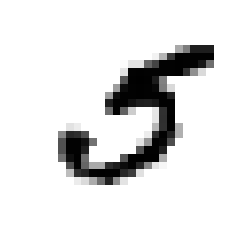

In [54]:
visualize_mnist(train, 36000)

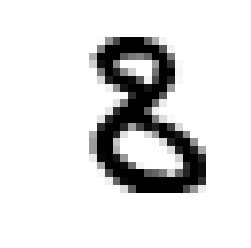

In [55]:
visualize_mnist(shuffled, 36000)

In [56]:
y[36000], y_[36000]

(5, 8)

In [57]:
y_train = (y_ == 5)
y_test = (test[1] == 5)

from sklearn.linear_model import SGDClassifier
from evaluation import EvaluateClassifier as EC

ec = EC(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
ec.run(X_, y_train, cv=3)

2019-02-03 22:13:34 ml           INFO     SGDClassifier
2019-02-03 22:13:34 ml           INFO     ==========
2019-02-03 22:13:34 ml           INFO     ('Confusion Matrix:', array([[52245,  2334],
       [  832,  4589]]))
2019-02-03 22:13:34 ml           INFO     ('P/R', ['0.66', '0.85', '0.74'])
2019-02-03 22:13:34 ml           INFO     --------




In [81]:
def prc_graph(prec, rec, thresh):
    plt.figure(figsize=(8, 4))
    plt.plot(thresh, prec[:-1], 'b--', label="Precision")
    plt.plot(thresh, rec[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([-700000, 700000])
    plt.show()

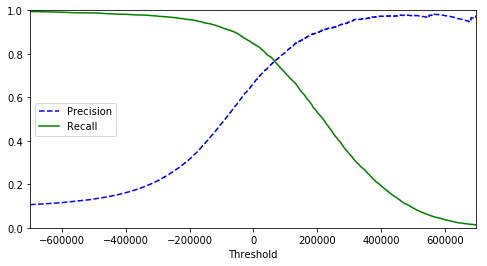

In [89]:
p, r, t = ec.pc_curve(X_, y_train, cv=3, method='decision_function')

prc_graph(p, r, t)

In [90]:
from sklearn.metrics import precision_score, recall_score

ts = [100000 * (x - 7) for x in range(15)]

for t in ts:
    z = (scores > t)
    ps = precision_score(y_train, z)
    rs = recall_score(y_train, z)
    print(t, z[z==True].shape, ps, rs)

-700000 (50622,) 0.1064951997155387 0.9944659656889873
-600000 (46369,) 0.1158748301667062 0.9911455451023796
-500000 (40498,) 0.13225344461454885 0.988009592326139
-400000 (32973,) 0.1614047857337822 0.981737686773658
-300000 (24386,) 0.21643565980480603 0.973621103117506
-200000 (16439,) 0.31565180363769085 0.9572034679948349
-100000 (10442,) 0.47854817084849643 0.9217856484043534
0 (6923,) 0.6628629206991189 0.8465227817745803
100000 (4798,) 0.8047102959566486 0.7122302158273381
200000 (3216,) 0.8973880597014925 0.5323741007194245
300000 (1961,) 0.9464558898521163 0.34237225604132077
400000 (1086,) 0.9723756906077348 0.19479800774764802
500000 (512,) 0.974609375 0.09204943737317837
600000 (210,) 0.9761904761904762 0.03781590112525364
700000 (75,) 0.9733333333333334 0.013466150156797639
